# 뉴스 카테고리 프로젝트
## Vocabulary Size를 변경하고 시도해보기
- 기존 num_words=10000
- 비교 num_words=None  // 모든 단어 사용
- 비교 num_words=5000  // 빈도수 상위 5000개 단어 사용
---

### 1. 모든 단어 사용
### 2. 빈도수 상위 5,000개 단어 사용
### 3. 직접 단어 개수를 설정해서 사용
### 4. 딥러닝 모델과 비교해보기

### 실험 사항: 모델 선정하기
- 프로젝트를 진행하기 전에. 뉴스 카테고리를 다중분류를 잘 할 수 있는 모델을 미리 선정해봤다.
- 그 이유는 모델을 모두 돌리기에는 학습 시간이 너무 오래걸리기에 적합한 모델을 조사하고 진행을 해봤다.

#### 로이터 뉴스 데이터셋 파헤치기
모델을 잘 선정하려면, 해당 데이터를 잘 파악해야 좋은 접근이라고 배웠다.

`Reuters` 뉴스 데이터셋은 자연어처리와 텍스트 분류 작업에서 자주 사용되는 대표적 다중 분류 데이터셋이다.

카테고리는 경제, 무역, 과학, 스포츠 등 다양하며 주요 주제로 무역, 주식 시장, 금융, 스포츠, 정치 등 다룬다.
- 카테고리 수: 46~90개 사이 카테고리
- 라벨 불균형: 특정 카테고리가 더 많이 포함되있어 데이터 불균형 문제 존재 가능성이 있다.
- 이미 토큰화된 인덱스 리스트로 제공(이미 사전에서 특정 단어 인덱스 변환된 상태)

#### 10000개 였을 때 가장 높은 모델,방식(70~80%)
- 1등) 로지스틱 회귀 모델의 정확도: 81%
- 2등) 보팅 방법의 정확도: 79%
- 3등) 선형 서포트 벡터 머신 모델의 정확도: 79%
- 4등) Complement Naive Bayes Classifier(CNB) 모델의 정확도: 77%
- 5등) 그레디언트 부스팅 트리 모델의 정확도: 76.6%

#### 다중 분류 데이터에 특화된 모델
- 서포트 벡터 머신(SVM): 고차원 데이터 적합, 텍스트 데이터 분류에 높은 성능, 선형/비선형 관계 처리 수월
- 랜덤 포레스트(RF): 앙상블 모델로 일반화 성능에 좋음, 다중분류 안정적 동작
- 그래디언트 부스팅 트리(GBT): 복잡한 데이터에서 성능 좋음, 튜닝 결과에 따른 높은 성능, 학습시간 오래걸림
- 보팅(Voting): 여러 모델의 장점 결합, `SVM, 로지스틱 회귀, 랜덤 포레스트` 결합 소프트 보팅 추천 


라이브러리 임포트

In [1]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 1. 모든 단어 사용 (None)

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [4]:
# 데이터 구성 출력
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [6]:
print(y_train[0])
print(y_test[0])

3
3


In [7]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


##### 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


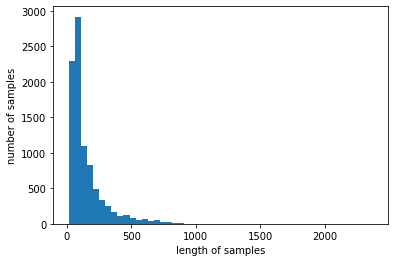

In [8]:
# 데이터 분포 확인
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 길이가 가장 긴 뉴스 길이: 2,376.
- 평균 길이: 145
- 500 ~ 1,000 사이 길이도 있지만 대부분 0~300 예상.

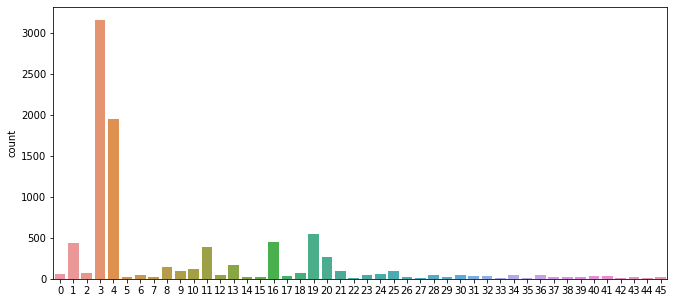

In [9]:
# 클래스 분포 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [10]:
# 수치적으로 정확한 출력
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


##### 데이터 복원하기

원본 뉴스 데이터로 복원
- 정수 -> 텍스트 ('단어'-> key값, '정수'-> value) 딕셔너리 ㅣ제공

In [11]:
# 데이터의 단어장(word_index)
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [12]:
index_to_word = { index+3 : word for word, index in word_index.items() }

print(index_to_word[4])  # 1+3
print(index_to_word[16])  # 13+3

the
it


In [13]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


##### OOV 문제와 UNK 토큰
- 기계가 미처 배우지 못한 모르는 단어: OOV(Out Of Vocabulary), UNK(unknown) -> `<UNK>`

In [14]:
# 전체 훈련용 뉴스데이터->텍스트 데이터 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [15]:
# 전체 테스트용 뉴스데이터->텍스트 데이터 변환
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)


x_test = decoded_test
print(len(x_test))

2246


In [16]:
x_train[:5]
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

##### 벡터화 하기

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# DTM 생성 및 크기 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [18]:
# TF-IDF Matrix 사이킷런 `TfidfTransformers()
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


#####  나이브 베이즈 분류기

In [19]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산


# 나이브 베이즈 분류기, multinomialNB(), fit() 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [20]:
# 사이즈 확인
print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")


x_test size: 2246
y_test size: 2246


In [21]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


- num_words가 10000개 였을 때 보다 정확도가 6%나 떨어졌다.

In [22]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [23]:
y_test[3]

4

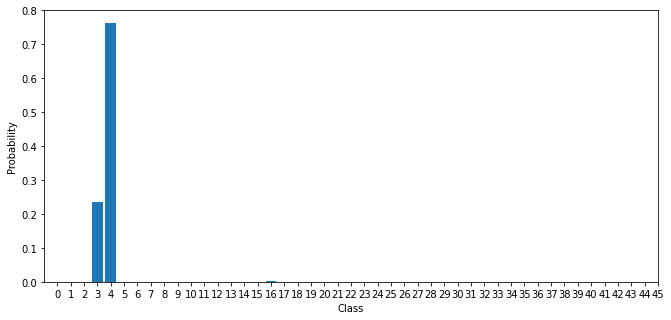

In [24]:
# 단어 분포 시각화
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [25]:
model.predict(tfidfv_test[3])

array([4])

##### F1-Score, Confusion Matrix(혼동행렬) 확인

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 개수로 가중평균
- accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

---

> f1-score

- num_words: 10000개, accuracy:66%, macro:10%, weight:58%
- num_words: None, accuracy:60%, macro:7%, weight:50%   // 전체적으로 떨어졌다.

##### Confusion Matrix
TP는 True로 예측하고 실제 값도 True, FN은 False로 예측하고 실제는 True

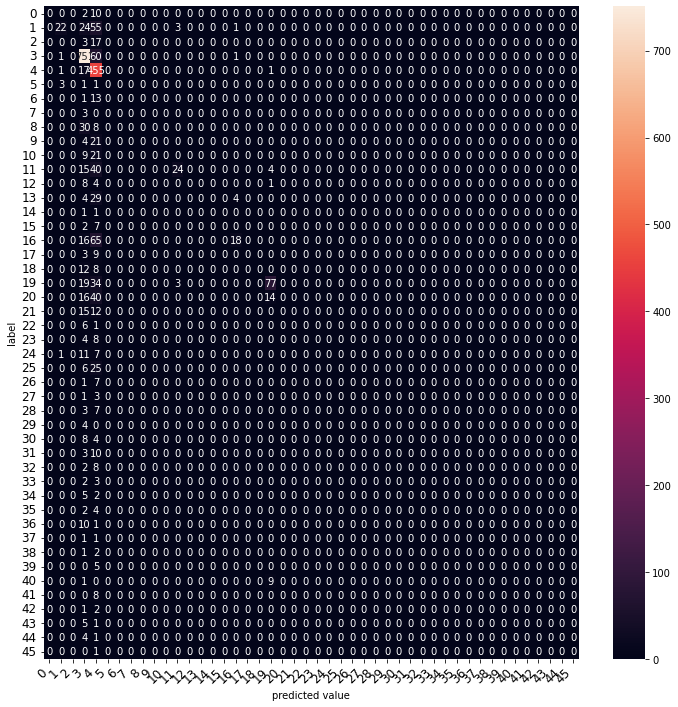

In [27]:
# Confusion Matrix
# TP는 True로 예측하고 실제 값도 True, FN은 False로 예측하고 실제는 True

def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

graph_confusion_matrix(model, tfidfv_test, y_test)

#### Complement Naive Bayes Classifier(CNB)
- 데이터 불균형 경우에 가중치 부여 특징

In [29]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


#### 로지스틱 회귀
- 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습
- 학습이 오래걸리지만 정확도가 잘 나옴

In [30]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


#### 선형 서포트 벡터 머신
- 고차원 데이터에 매우 적합, 선형/비선형 관계 처리, 텍스트 데이터 분류에 우수한 성능

In [31]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 이미 학습된 lsvc 모델을 테스트 데이터로 예측
predicted = lsvc.predict(tfidfv_test)  # tfidfv_test는 테스트 데이터를 TF-IDF로 변환한 것

# 정확도 계산
accuracy = accuracy_score(y_test, predicted)  # y_test는 실제 테스트 데이터의 레이블
print(f"Test Accuracy: {accuracy:.4f}")

# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 리포트 출력 (정밀도, 재현율, F1 Score 등을 포함)
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.7943
Confusion Matrix:
[[ 8  1  0 ...  0  0  0]
 [ 0 80  1 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  1  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.73      0.76      0.74       105
           2       0.62      0.75      0.68        20
           3       0.92      0.92      0.92       813
           4       0.81      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.58      0.68      0.63        38
           9       0.81      0.84      0.82        25
          10       0.89      0.80      0.84        30
          11       0.65      0.75      0.70        83
          12       0.44      0.31      0.36        13
          13       0.64 

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

#### 결정 트리(Decision Tree)
- 결정 트리는 복잡한 데이터를 직관적으로 분류하며 가지치기를 사용

In [32]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


#### 랜덤 포레스트(Random Forest)
- 앙상블(Ensemble) 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

In [33]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 선언 (estimator 5개, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=0)

# 모델 훈련 (tfidfv는 TF-IDF로 변환한 훈련 데이터, y_train은 훈련 레이블)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


#### 그래디언트 부스팅 트리(Gradient Boosting Classifier)
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.
- 메모리도 적게 사용하고 예측도 빠릅니다

In [34]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


#### 보팅(Voting)
- 소프트 보팅(Soft Voting): 각 분류기의 확률 출력을 이용해 최종 예측을 수행.

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier

# 조건 1: 로지스틱 회귀 모델 (L2 패널티 사용)
log_clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=0)

# 조건 2: Complement Naive Bayes
cnb_clf = ComplementNB()

# 조건 3: Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=0)

# 소프트 보팅 분류기 생성
voting_classifier = VotingClassifier(
    estimators=[('lr', log_clf), ('cnb', cnb_clf), ('gb', gb_clf)], 
    voting='soft'
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

# 예측
predicted = voting_classifier.predict(tfidfv_test)

# 성능 평가
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

Voting Classifier Accuracy: 0.7983


In [36]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7983081032947462


### 평가 (num_words=None) 및 계획

num_words를 10000개 설정했을 때와 별반 다를 게 없었다.

모든 단어 수와 10000개와 데이터양이 별 차이가 나지 않기 때문인 것 같기도 하다.

이번에는 words 수를 5000개로 줄이고, 가장 성능 좋았던 모델(SVM, 로지스틱 회귀, 랜덤 포레스트)를 선정하고 마지막에는 보팅 소프트보팅 방식으로 진행해보겠다.

## 2. 빈도수 상위 5,000개 단어 사용

In [37]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [38]:
# 데이터 구성 출력
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [39]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


##### 데이터 분포 확인(num: 5000)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


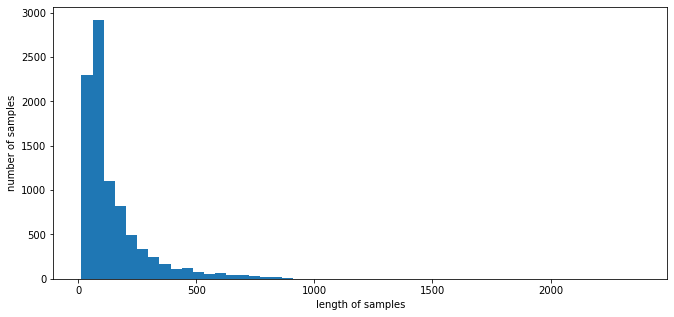

In [40]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

##### 클래스 분포 확인(num: 5000)

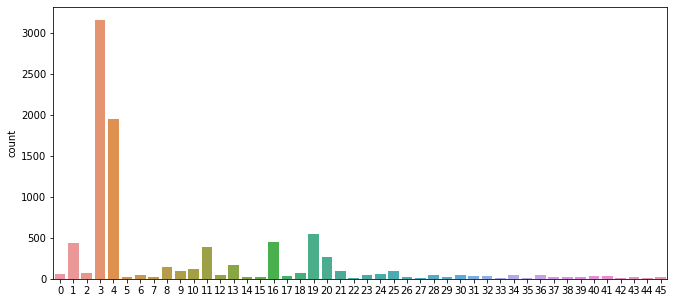

In [41]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [42]:
# 수치적으로 정확한 출력
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


##### 원본 뉴스 데이터 복원

In [43]:
# 데이터의 단어장(word_index)
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [44]:
index_to_word = { index+3 : word for word, index in word_index.items() }

print(index_to_word[4])  # 1+3
print(index_to_word[16])  # 13+3

the
it


In [45]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


##### OOV문제 UNK토큰
- 전체 훈련용 뉴스 데이터, 테스트용 뉴스 데이터 -> 텍스트 데이터 변환

In [46]:
# 전체 훈련용 뉴스 데이터 -> 텍스트 데이터
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [47]:
# 전체 테스트용 뉴스 데이터 -> 텍스트 데이터
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)


x_test = decoded_test
print(len(x_test))

2246


##### 벡터화 하기
- 텍스트 분류 과정을 표현.
- 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# DTM 생성 및 크기 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [49]:
# TF-IDF Matrix 사이킷런 `TfidfTransformers()
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


##### 나이브베이즈 분류기

In [52]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

# 나이브 베이즈 분류기, multinomialNB(), fit() 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)

print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")


x_test size: 2246
y_test size: 2246


In [53]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [54]:
model.predict(tfidfv_test[3])

array([4])

### F1-Score 계산

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

## 3. 직접 단어 개수를 설정해서 사용
### 실험 모델 사용
- 로지스틱회귀, 서포트벡터머신, 랜덤포레스트, 보팅

#### 로지스틱 회귀 

In [55]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8036509349955476


#### 서포트 벡터 머신

In [57]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 이미 학습된 lsvc 모델을 테스트 데이터로 예측
predicted = lsvc.predict(tfidfv_test)  # tfidfv_test는 테스트 데이터를 TF-IDF로 변환한 것

# 정확도 계산
accuracy = accuracy_score(y_test, predicted)  # y_test는 실제 테스트 데이터의 레이블
print(f"Test Accuracy: {accuracy:.4f}")

# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 리포트 출력 (정밀도, 재현율, F1 Score 등을 포함)
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)


Test Accuracy: 0.7729
Confusion Matrix:
[[ 8  0  0 ...  0  0  0]
 [ 0 75  1 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  1  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.69      0.71      0.70       105
           2       0.75      0.75      0.75        20
           3       0.89      0.90      0.89       813
           4       0.81      0.82      0.81       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.62      0.66      0.64        38
           9       0.79      0.88      0.83        25
          10       0.77      0.80      0.79        30
          11       0.63      0.72      0.67        83
          12       0.28      0.38      0.32        13
          13       0.53 

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

정하진 않았지만 좋다고 하기에 랜덤포레스트 모델을 실행해보겠습니다.
#### 랜덤 포레스트(Random Forest)

In [58]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 선언 (estimator 5개, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=0)

# 모델 훈련 (tfidfv는 TF-IDF로 변환한 훈련 데이터, y_train은 훈련 레이블)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.701246660730187


num_words=10000개 일 때 보다는 3% 더 높은 정확도를 보였다.

랜덤 포레스트 방식이 컴플리먼트 나이브 베이즈(CNB) 분류기보다 나은지 확인하기 위해 CNB를 실행해보겠다.

In [59]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


여전히 CNB 가 높기에. 보팅 방식에는 
1) 로지스틱 회귀 
2) 서포트 벡터 머신 
3) CNB 모델 을 

사용하여 소프트 보팅을 하였을 때 성능을 비교해보겠다.

#### 보팅(Voting)
- 로지스틱회귀, Complement Naive Bayes, 서포트벡터머신 사용

> 주의: SVC는 확률을 제공하지 않음! 보팅 사용 조치 필요

- SVC 사용: LinearSVC는 확률을 제공하지 않으므로, 대신 SVC를 사용하여 `probability=True` 를 설정
    - 이렇게 하면 소프트 보팅에서 필요로 하는 확률 예측이 가능
- Voting Classifier: 소프트 보팅을 사용하여 각 모델의 확률 기반 예측값을 결합하여 최종 예측을 수행

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC  # LinearSVC 대신 SVC 사용
from sklearn.metrics import accuracy_score

# 조건 1: 로지스틱 회귀 모델 (L2 패널티 사용)
log_clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=0)

# 조건 2: Complement Naive Bayes
cnb_clf = ComplementNB()

# 조건 3: SVC (확률 예측을 위해 probability=True 설정)
svc_clf = SVC(probability=True, random_state=0)

# 소프트 보팅 분류기 생성
voting_classifier = VotingClassifier(
    estimators=[('lr', log_clf), ('cnb', cnb_clf), ('svc', svc_clf)], 
    voting='soft'  # 소프트 보팅 (확률 기반)
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

# 예측
predicted = voting_classifier.predict(tfidfv_test)

# 성능 평가
accuracy = accuracy_score(y_test, predicted)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


Voting Classifier Accuracy: 0.8268


## num_words에 따른 평가 정리

|num_words|f1-score|로지스틱회귀|SVC|보팅|
|-----|---|---|---|---|
|10000|0.66|0.81|0.79|0.79|
|None|0.60|0.81|0.79|0.79|
|5000|0.67|0.80|0.77|0.82|

- 표를 정리해서 보이기만 해도, 10000개와 None 부분은 별로 차이가 없는 것을 알 수 있다.
- 그나마 좀 다른 점이라면 5000개를 줬을 때 부분은 80%대를 넘기지 못한 보팅 방식이 82%를 달성한 것을 볼 수 있다.

## 4. 딥러닝 모델과 비교해 보기
- RNN 모델 비교
- LSTM 모델 비교

In [67]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 1. 데이터 전처리 함수
def preprocess_data(num_words=5000, maxlen=100):
    
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    # 시퀀스의 길이를 맞추기 위한 패딩
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    
    # 원-핫 인코딩
    num_classes = np.max(y_train) + 1  # 클래스 개수 (0부터 시작하므로 +1)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test, num_classes

# 2. 모델 생성 함수
def build_rnn_model(vocab_size, maxlen, num_classes):

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))  # 임베딩 레이어
    model.add(SimpleRNN(128))  # RNN 레이어
    model.add(Dense(num_classes, activation='softmax'))  # 출력 레이어 (다중 클래스 분류)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# 3. 모델 학습 함수
def train_model(model, x_train, y_train, batch_size=64, epochs=50, validation_split=0.2):

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    return history

# 4. 모델 평가 함수
def evaluate_model(model, x_test, y_test):

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test 정확도: {test_acc:.4f}")
    
    # 예측값 계산
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # 정확도 출력
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    print(f"정확도: {accuracy:.4f}")
    
    return accuracy

# 5. 전체 실행 함수(파이프라인 정의)
def run_rnn_pipeline(num_words=5000, maxlen=100, epochs=50):

    # 데이터 전처리
    x_train, y_train, x_test, y_test, num_classes = preprocess_data(num_words=num_words, maxlen=maxlen)
    
    # 모델 생성
    model = build_rnn_model(vocab_size=num_words, maxlen=maxlen, num_classes=num_classes)
    
    # 모델 학습
    train_model(model, x_train, y_train, epochs=epochs)
    
    # 모델 평가
    evaluate_model(model, x_test, y_test)

# 6. RNN 파이프라인 실행
run_rnn_pipeline(num_words=5000, maxlen=100, epochs=50)


Epoch 1/50
113/113 [==============================] - 9s 76ms/step - loss: 2.4642 - accuracy: 0.3537 - val_loss: 2.2658 - val_accuracy: 0.3945
Epoch 2/50
113/113 [==============================] - 8s 74ms/step - loss: 2.4010 - accuracy: 0.3942 - val_loss: 2.3556 - val_accuracy: 0.3868
Epoch 3/50
113/113 [==============================] - 8s 74ms/step - loss: 2.0110 - accuracy: 0.4857 - val_loss: 2.1804 - val_accuracy: 0.4274
Epoch 4/50
113/113 [==============================] - 8s 73ms/step - loss: 1.7358 - accuracy: 0.5630 - val_loss: 2.1328 - val_accuracy: 0.4597
Epoch 5/50
113/113 [==============================] - 8s 74ms/step - loss: 1.4970 - accuracy: 0.6287 - val_loss: 2.2359 - val_accuracy: 0.4580
Epoch 6/50
113/113 [==============================] - 8s 74ms/step - loss: 1.1395 - accuracy: 0.7208 - val_loss: 2.2953 - val_accuracy: 0.4585
Epoch 7/50
113/113 [==============================] - 8s 74ms/step - loss: 0.8699 - accuracy: 0.7847 - val_loss: 2.4207 - val_accuracy: 0.4602

LSTM 모델

In [70]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 1. 데이터 전처리 함수
def preprocess_data(num_words=5000, maxlen=100):

    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    # 시퀀스의 길이를 맞추기 위한 패딩
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    
    # 원-핫 인코딩
    num_classes = np.max(y_train) + 1  # 클래스 개수 (0부터 시작하므로 +1)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test, num_classes

# 2. LSTM 모델 생성 함수
def build_lstm_model(vocab_size, maxlen, num_classes):

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    
    # 첫 번째 LSTM 레이어 (드롭아웃 추가)
    model.add(LSTM(128, return_sequences=True))  # return_sequences=True: 시퀀스를 다음 LSTM 레이어로 전달
    model.add(Dropout(0.5))  # 과적합 방지를 위한 드롭아웃
    
    # 두 번째 LSTM 레이어 (마지막 시퀀스만 출력)
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# 3. 모델 학습 함수
def train_model(model, x_train, y_train, batch_size=64, epochs=50, validation_split=0.2):

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    return history

# 4. 모델 평가 함수
def evaluate_model(model, x_test, y_test):

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    print(f"Accuracy on Test Data: {accuracy:.4f}")
    
    return accuracy

# 5. 전체 실행 함수
def run_lstm_pipeline(num_words=5000, maxlen=100, epochs=50):

    # 데이터 전처리
    x_train, y_train, x_test, y_test, num_classes = preprocess_data(num_words=num_words, maxlen=maxlen)
    
    # 모델 생성
    model = build_lstm_model(vocab_size=num_words, maxlen=maxlen, num_classes=num_classes)
    
    # 모델 학습
    train_model(model, x_train, y_train, epochs=epochs)
    
    # 모델 평가
    evaluate_model(model, x_test, y_test)

# 6. LSTM 파이프라인 실행
run_lstm_pipeline(num_words=5000, maxlen=100, epochs=50)


Epoch 1/50
113/113 [==============================] - 4s 17ms/step - loss: 2.4670 - accuracy: 0.3958 - val_loss: 1.8568 - val_accuracy: 0.4997
Epoch 2/50
113/113 [==============================] - 1s 11ms/step - loss: 1.8762 - accuracy: 0.5008 - val_loss: 1.7249 - val_accuracy: 0.5409
Epoch 3/50
113/113 [==============================] - 1s 11ms/step - loss: 1.6535 - accuracy: 0.5687 - val_loss: 1.6248 - val_accuracy: 0.5988
Epoch 4/50
113/113 [==============================] - 1s 11ms/step - loss: 1.5010 - accuracy: 0.6171 - val_loss: 1.5140 - val_accuracy: 0.6127
Epoch 5/50
113/113 [==============================] - 1s 11ms/step - loss: 1.3457 - accuracy: 0.6497 - val_loss: 1.5275 - val_accuracy: 0.6071
Epoch 6/50
113/113 [==============================] - 1s 11ms/step - loss: 1.2318 - accuracy: 0.6828 - val_loss: 1.5661 - val_accuracy: 0.6010
Epoch 7/50
113/113 [==============================] - 1s 11ms/step - loss: 1.1262 - accuracy: 0.7088 - val_loss: 1.4349 - val_accuracy: 0.6372

### 평가 (5000 base)
- 첫 번째 시도(Epoch: 10/50, RNN 레이어) - Accuracy: 0.4791->0.4257
- 두 번째 시도(Epoch: 10/50, LSTM 레이어) - Accuracy: 0.6046->0.66~0.69 

#### 뉴스 카테고리 다중 분류 방식 중 보팅 방식이 왜 RNN, LSTM 모델 보다 더 정확도가 잘 나오는걸까?
- 보팅 방식은 **여러 개의 다른 머신 러닝 모델의 예측을 조합**하여 최종 결과를 도출하는 앙상블 학습 방식임. 이는 개별 모델 **하나보다 더 좋은 성능**을 발휘할 가능성이 크다. 
- 물론, RNN,LSTM 모델은 시퀀스 데이터를 처리하기에 긴 시퀀스, 복잡한 문맥의 데이터를 이해하는데 유리함. 하지만 뉴스 카테고리 분류 문제처럼 **특정 단어 빈도에 의존도가 높고**, **문맥 의존도가 낮은 문제**에서는 성능이 저하됨, 그렇기에 단어 빈도를 기반으로 하는 보팅 방식이 더 적합하다고 볼 수 있다.
- 그리고 보팅 방식은 여러 모델을 더 결합함으로 **과적합**을 방지할 수 있다.

##### 로지스틱 회귀도 높다.(80%) 그렇다면 다중 분류 문제에는 딥러닝 모델보다 머신러닝 모델이 더 성능이 좋은가?
- 그건 아니다. 문제의 특성이나 데이터셋의 특징 등에 따른 모델의 목적에 따라 선택하기 나름이다. 다만, TF-IDF 같은 방식으로 단어를 수치화하여 학습시키는 머신러닝 모델은 단어 빈도 기반 문제에 적합하다.
- 그렇기에 로지스틱 회귀 모델도 각 단어의 빈도와 카테고리 간의 관계를 잘 설명할 수 있는 선형 모델로서, 뉴스 분류 작업에서 매우 효과적이라고 볼 수 있다.

|num_words|f1-score|로지스틱회귀|SVC|보팅|RNN|LSTM|
|-----|---|---|---|---|---|---|
|10000|0.66|0.81|0.79|0.79|---|---|
|None|0.60|0.81|0.79|0.79|---|---|
|5000|0.67|0.80|0.77|0.82|0.48|0.69|

## 회고
```
오늘은 뉴스 카테고리를 다중분류하는 다양한 방식에 대해 공부해봤다. 
로이터 뉴스 데이터는 다른 데이터와 다르게 재밌었다. 
이미 토큰화된 인덱스 리스트로 제공되어 다시 데이터를 원본으로 복원하는 과정에서 많은 인사이트를 얻었다. 

다양한 모델을 사용할 때, complement Naive Bayes classifier 모델에 대해 잘 몰랐었는데, 데이터의 불균형을 해결하는 방법으로 Bayes 모델을 사용해 가중치를 부여하는 특징에 대해 알아가서 좋았고, 특히 보팅 하는 방식을 딱 한번 해봤는데, 이번에 다양한 모델로 시도를 해봐서 되게 좋았다.

확실한건, 앞으로 프로젝트를 진행하게 되면 데이터의 특성을 가장 먼저 파악하는 것이 중요한 것 같았다. 이번에 흔한 텍스트 데이터가 아닌, 이미 토큰화된 데이터로 시작해봤는데. 이걸 해결하고 복원하고 학습하는 경험이 앞으로도 정말 중요할 것 같았다.
```